In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Activation, ZeroPadding2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import load_model

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
label_dictionary={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=14, batch_size=150, verbose=1)
Test = model.evaluate(x_test, y_test)
print('Loss=',Test[0],'Accuracy',Test[1])

Epoch 1/14
267/267 [==============================] - 51s 27ms/step - loss: 1.9512 - accuracy: 0.2716 - val_loss: 1.5681 - val_accuracy: 0.4813
Epoch 2/14
267/267 [==============================] - 6s 22ms/step - loss: 1.2766 - accuracy: 0.5383 - val_loss: 1.2437 - val_accuracy: 0.5820
Epoch 3/14
267/267 [==============================] - 6s 22ms/step - loss: 1.0512 - accuracy: 0.6265 - val_loss: 1.0562 - val_accuracy: 0.6521
Epoch 4/14
267/267 [==============================] - 6s 22ms/step - loss: 0.9127 - accuracy: 0.6742 - val_loss: 1.0777 - val_accuracy: 0.6325
Epoch 5/14
267/267 [==============================] - 6s 23ms/step - loss: 0.8389 - accuracy: 0.7025 - val_loss: 0.9204 - val_accuracy: 0.6808
Epoch 6/14
267/267 [==============================] - 6s 22ms/step - loss: 0.7440 - accuracy: 0.7371 - val_loss: 0.8594 - val_accuracy: 0.7099
Epoch 7/14
267/267 [==============================] - 6s 23ms/step - loss: 0.7102 - accuracy: 0.7497 - val_loss: 0.8157 - val_accuracy: 0.717

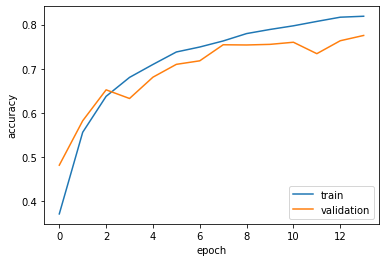

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='lower right')
plt.show()

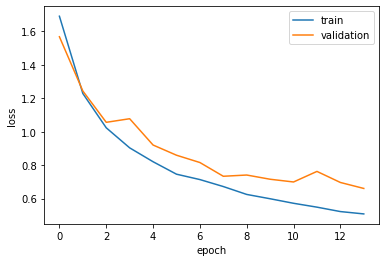

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [ ]:
prediction_1=model.predict_classes(x_test, 100, verbose=1)
prediction_1

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


100/100 [==============================] - 1s 4ms/step


array([3, 8, 8, ..., 5, 1, 7])

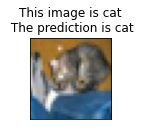

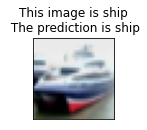

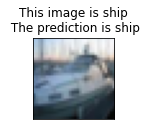

In [ ]:
import matplotlib.pyplot as plt
for i in range(3):
  plt.figure(figsize=(1.5,1.5))
  plt.imshow(X_test[i])
  label= label_dictionary[int(Y_test[i])]
  label_pict= label_dictionary[int(prediction_1[i])]
  title= 'This image is ' + label + '\n The prediction is ' + label_pict
  plt.xticks([]);plt.yticks([])
  plt.title(title)
  plt.show

In [ ]:
Y_test_1D=Y_test.flatten()
import pandas as pd
pd.crosstab(Y_test_1D,prediction_1,colnames=['prediction'],rownames=['label'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,786,10,38,14,26,5,9,5,87,20
1,15,884,4,10,1,3,6,1,15,61
2,70,2,625,52,139,43,49,9,10,1
3,15,4,58,612,93,119,67,14,9,9
4,12,1,29,38,860,13,29,12,6,0
5,3,2,38,185,70,639,30,23,7,3
6,4,1,39,45,49,9,848,0,5,0
7,11,3,27,49,124,47,8,725,2,4
8,43,16,11,9,11,5,5,2,888,10


In [ ]:
df=pd.DataFrame({'label':Y_test_1D,'predict':prediction_1})
df[:3]
#前三張測試圖片的結果

,label,predict
0,3,3
1,8,8
2,8,8


In [ ]:
df[(df.label==0)&(df.predict==5)]
#標籤為飛機但卻猜是狗(最左邊的數字是圖片編號)
#此語言可呼叫圖片(plt.imshow(x_test[左邊之圖片編號]))
#論壇網址https://nodoubting.blogspot.com/2018/01/keras-cnncifar-10.html
#測試比率為20%測試以及80%圖片留作訓練，為最佳比例
#批量以128每次最為準確
#曲線為些微過擬合
#手動去計算precision以及recall

,label,predict
1898,0,5
3620,0,5
4548,0,5
7609,0,5
7861,0,5
